# Importing Libraries

In [1]:
#Import libraries necessary for the project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading Of Dataset

In [2]:
df=pd.read_csv('Boston_Train.csv')     #Dataset was loaded
df.drop(columns=['Unnamed: 0'],axis=0, inplace=True)    #Serial number column was deleted
df.head()
#print("Boston housing dataset has {} data points with {} variables each.".format(*df.shape))

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
#Statistical info
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.401659,15.327635,8.435670,0.076923,0.510737,6.403900,60.817949,4.420862,4.472934,310.344729,17.707692,380.489174,10.407692,25.062678
std,0.641716,25.605040,6.088947,0.266850,0.102256,0.676424,28.393094,1.968666,1.615543,67.577707,2.198252,40.455904,5.888639,8.461918
min,0.006320,0.000000,0.460000,0.000000,0.385000,4.903000,2.900000,1.321600,1.000000,188.000000,12.600000,70.800000,1.730000,11.800000
25%,0.057845,0.000000,4.025000,0.000000,0.437450,5.949500,36.150000,2.768500,4.000000,264.000000,16.100000,383.670000,6.095000,19.500000
50%,0.132620,0.000000,6.200000,0.000000,0.493000,6.266000,62.000000,4.095200,4.000000,304.000000,17.900000,392.690000,9.380000,22.900000
75%,0.404865,22.000000,10.010000,0.000000,0.544000,6.733000,88.450000,5.871800,5.000000,358.000000,19.100000,396.220000,13.210000,28.700000
max,4.097400,100.000000,25.650000,1.000000,0.871000,8.725000,100.000000,9.222900,8.000000,469.000000,21.200000,396.900000,34.410000,50.000000


In [4]:
#datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     351 non-null    float64
 1   zn       351 non-null    float64
 2   indus    351 non-null    float64
 3   chas     351 non-null    int64  
 4   nox      351 non-null    float64
 5   rm       351 non-null    float64
 6   age      351 non-null    float64
 7   dis      351 non-null    float64
 8   rad      351 non-null    int64  
 9   tax      351 non-null    int64  
 10  ptratio  351 non-null    float64
 11  black    351 non-null    float64
 12  lstat    351 non-null    float64
 13  medv     351 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 38.5 KB


# Preprocessing the dataset

In [5]:
#check for null values
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [6]:
#There is no null values. So the preprocessing step is ignored.

# Exploratory Data Analysis

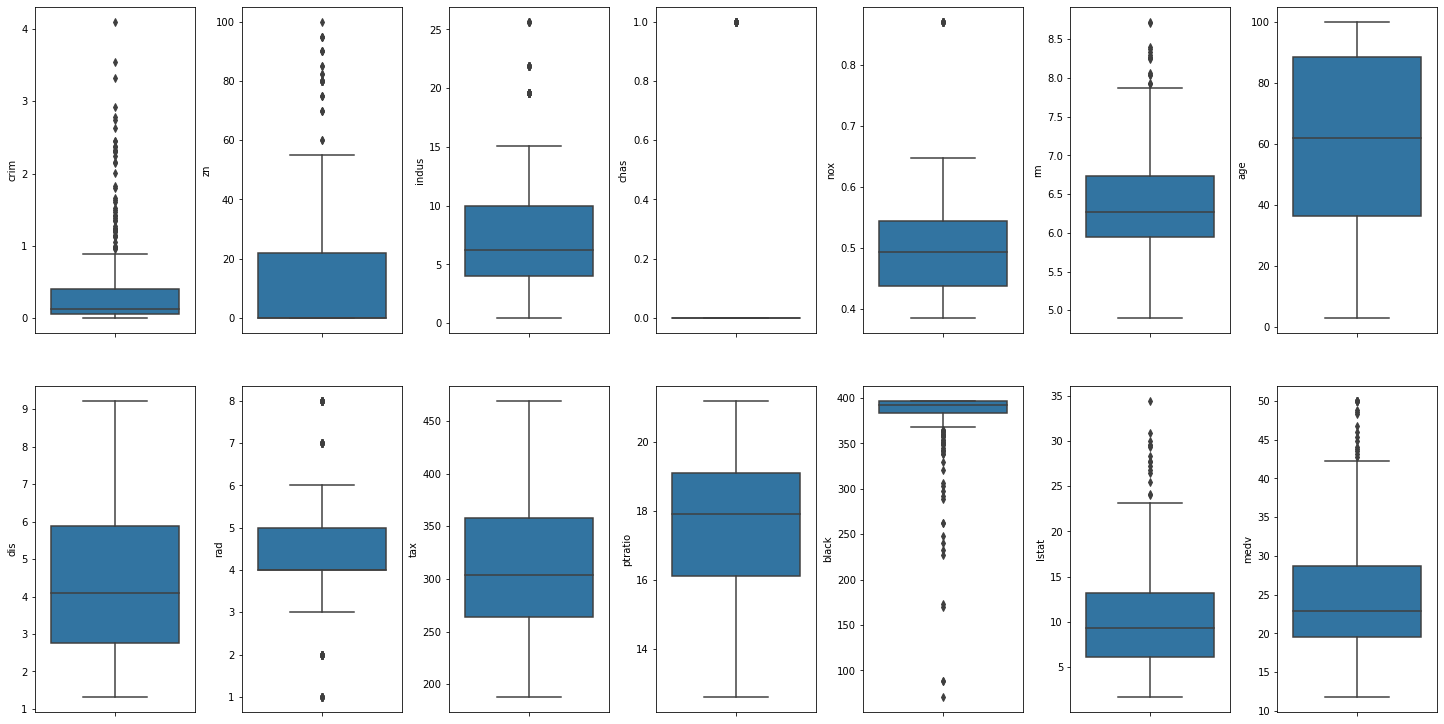

In [7]:
#Create Box plots (Box plots are used to identify the outliers from the datasets)
#Instead of creating boxplots for each one,box plots were created in a single loops. For that subplots are created.
fig,ax=plt.subplots(ncols=7, nrows=2, figsize=(20,10))    
index=0
ax=ax.flatten()
for col,value in df.items():   #df.items returns the colums and the corresponding values
    sns.boxplot(y=col, data=df, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)    #As initially there were many overlappings, so hyper paramated tuning was done to display the graph properly

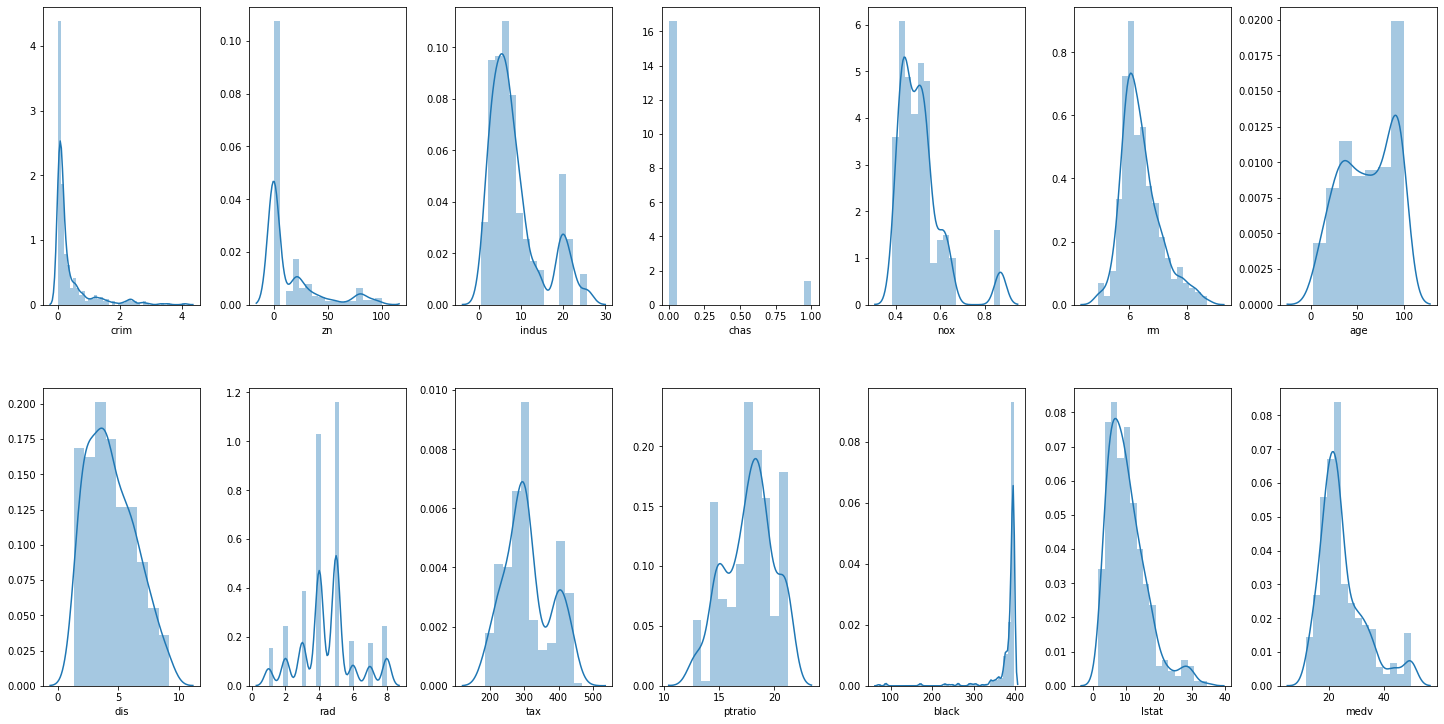

In [8]:
#Create dist plots  
fig,ax=plt.subplots(ncols=7, nrows=2, figsize=(20,10))    
index=0
ax=ax.flatten()
for col,value in df.items():   #df.items returns the colums and the corresponding values
    sns.distplot(value, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

## Min-Max Normalization

If the range of values are very large then we have to perform min-max normalization to get the range between 0-1.

In [9]:
cols=['crim','zn','tax','black']
for col in cols:
    #find minimun and maximum of the column
    minimum=min(df[col])
    maximum=max(df[col])
    df[col]=(df[col]-minimum)/(maximum-minimum)

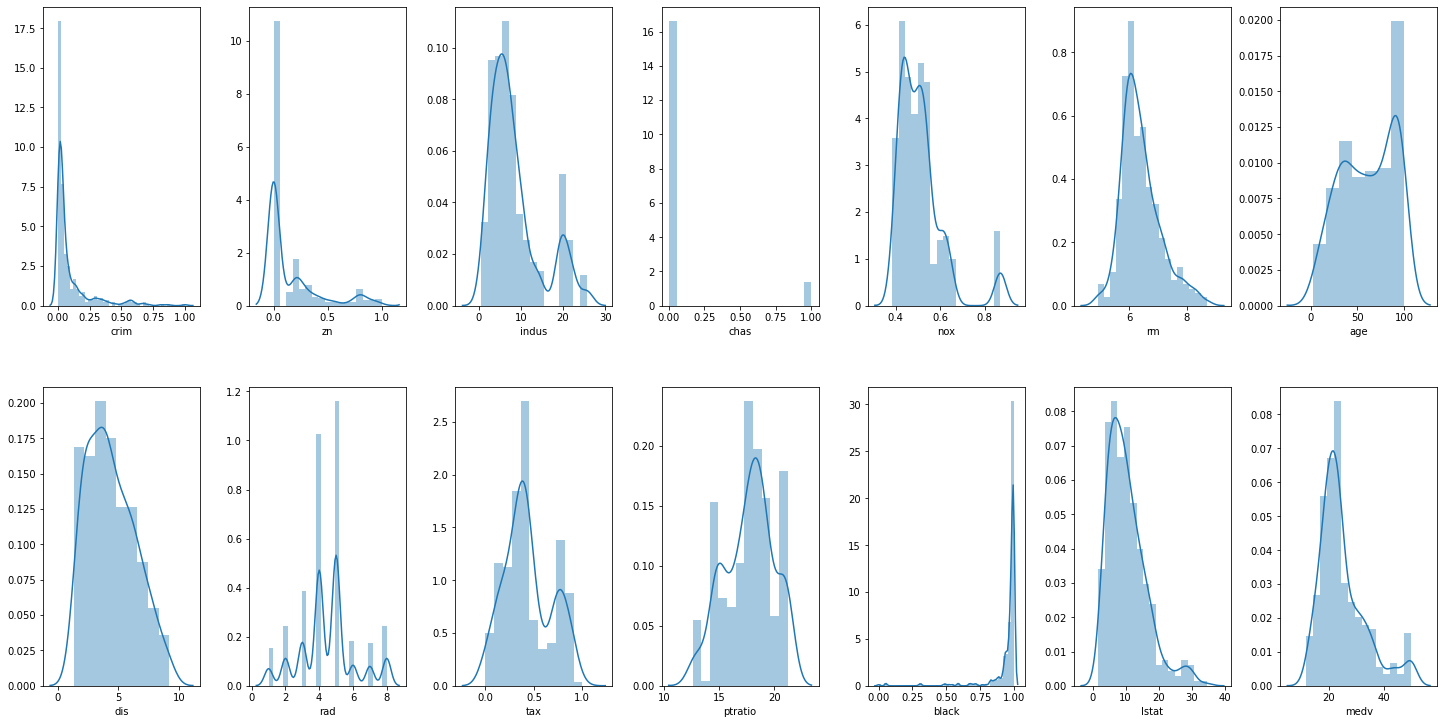

In [10]:
fig,ax=plt.subplots(ncols=7, nrows=2, figsize=(20,10))    
index=0
ax=ax.flatten()
for col,value in df.items():   
    sns.distplot(value, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

We can see after min-max normalization, all the values where min-max normalization was performed are in the range of 0-1. If the values have large difference means we have to use min-max normalization.

## Standardization

For some problems we need to have uniform distribution, for that we need to go for standardization. Standardization uses mean and standard deviation to create a standard score.

In [11]:
from sklearn import preprocessing
scalar = preprocessing.StandardScaler()

#fit our data
scaled_cols=scalar.fit_transform(df[cols])
scaled_cols=pd.DataFrame(scaled_cols,columns=cols)
scaled_cols.head()

,crim,zn,tax,black
0,-0.616945,0.104518,-0.212573,0.406226
1,-0.584189,-0.599472,-1.012794,0.406226
2,-0.584220,-0.599472,-1.012794,0.305479
3,-0.576293,-0.599472,-1.309172,0.350036
4,-0.519052,-0.599472,-1.309172,0.406226


In [12]:
for col in cols:
    df[col]= scaled_cols[col]

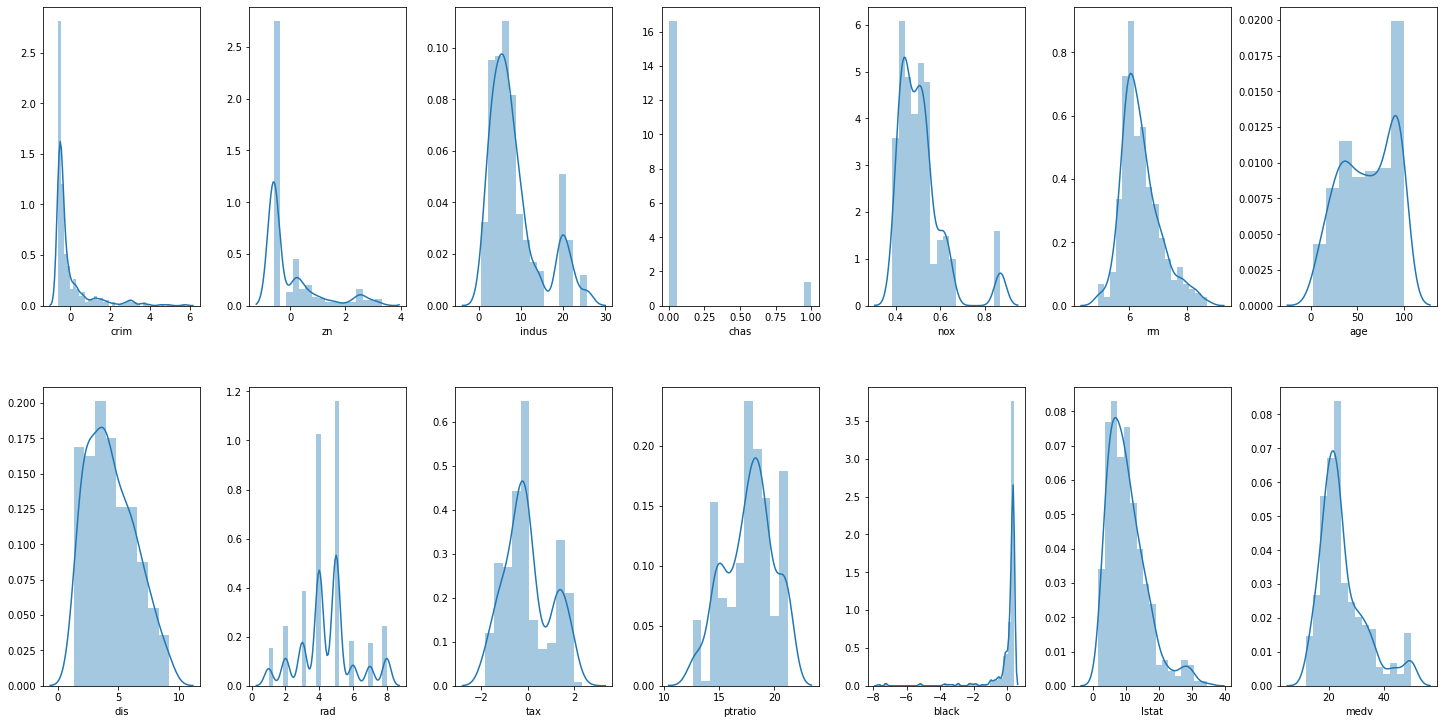

In [13]:
fig,ax=plt.subplots(ncols=7, nrows=2, figsize=(20,10))    
index=0
ax=ax.flatten()
for col,value in df.items():   
    sns.distplot(value, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

## Coorelation Matrix

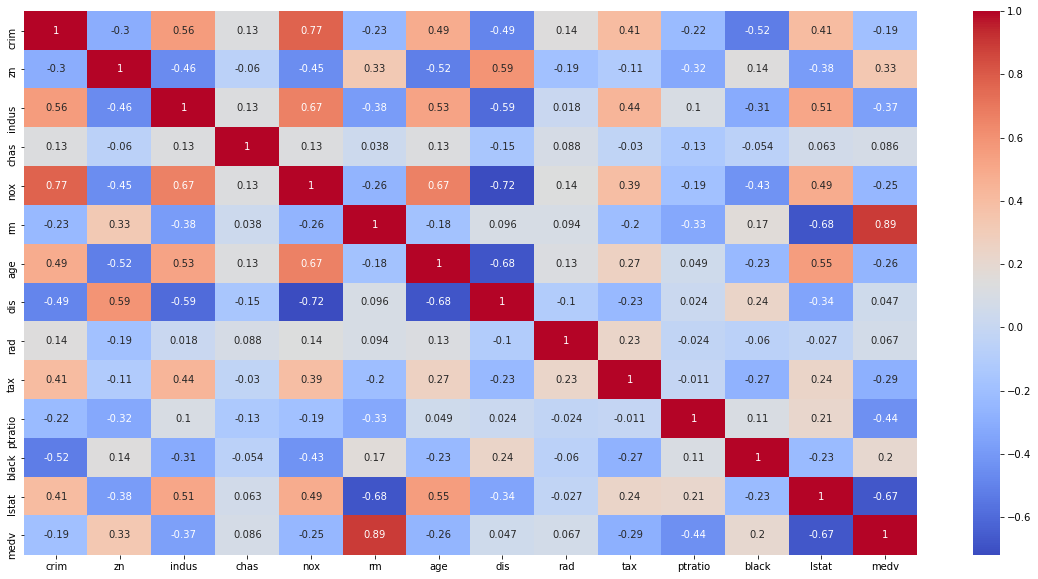

In [14]:
corr=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

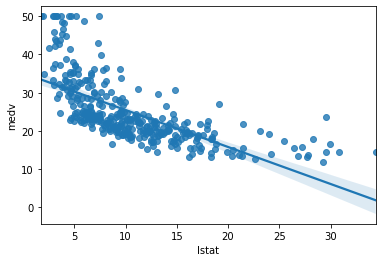

In [15]:
 sns.regplot(y=df['medv'], x=df['lstat']) 

In [16]:
# Here price is decreasing with increase of lstat

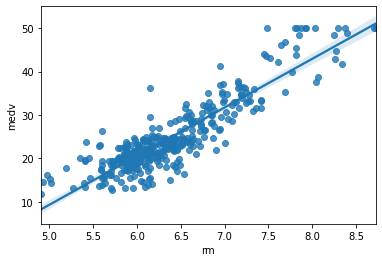

In [17]:
 sns.regplot(y=df['medv'], x=df['rm']) 

In [18]:
#Here price of the house increases with increase in rm

## Input Split

In [19]:
X=df.drop(columns=['medv','rad'], axis=1)
Y=df['medv']

## Model Training

In [20]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
def train(model,X,Y):
    #train the model
    x_train,x_test,y_train,y_test=train_test_split(X,Y, random_state=42)
    model.fit(x_train,y_train)
    
    #predict the training set
    pred=model.predict(x_test)
    
    #perform cross validation
    cv_score=cross_val_score(model, X,Y, scoring='neg_mean_squared_error',cv=5)
    cv_score=np.abs(np.mean(cv_score))
    
    print("Model Report")
    print("MSE:",mean_squared_error(y_test,pred))
    print("CV Score:",cv_score)

Model Report
MSE: 11.52011269819824
CV Score: 13.001589421597137


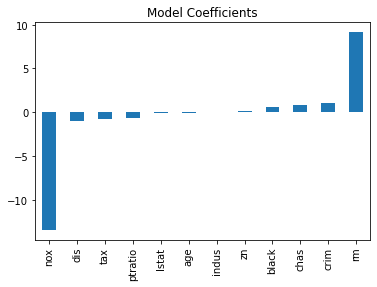

In [21]:
from sklearn.linear_model import LinearRegression
model=LinearRegression(normalize=True)
train(model,X,Y)
coef=pd.Series(model.coef_,X.columns).sort_values()
coef.plot(kind='bar',title='Model Coefficients')

For training with splitted dataset we have MSE of 11 and CV Score of 13. As we can see for Linear Regression rm has high positive coefficient and nox has high negative coefficient

Model Report
MSE: 19.392045454545453
CV Score: 17.552902213279676


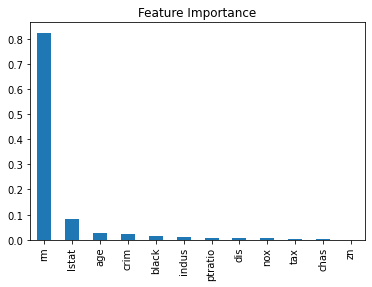

In [22]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
train(model,X,Y)
coef=pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar',title='Feature Importance')

Now we have MSE as 17 and CV Score as 15. It has CV Score higher than Linear Regression and for estimation we need to prefer CV Score only. So this is not the best model

Model Report
MSE: 11.731553897727276
CV Score: 10.411582285191153


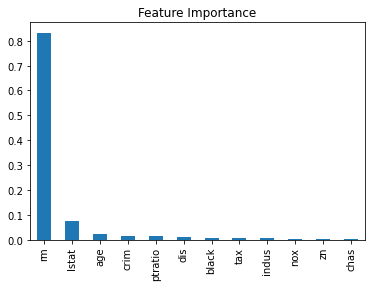

In [23]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
train(model,X,Y)
coef=pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar',title='Feature Importance')

 Here we get MSE as 11 and CV Score as 10. Here CV Score is lowest so we got the best model among three i.e. Random Forest Regressor.